![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importación librerías
import numpy as np
#import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [4]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


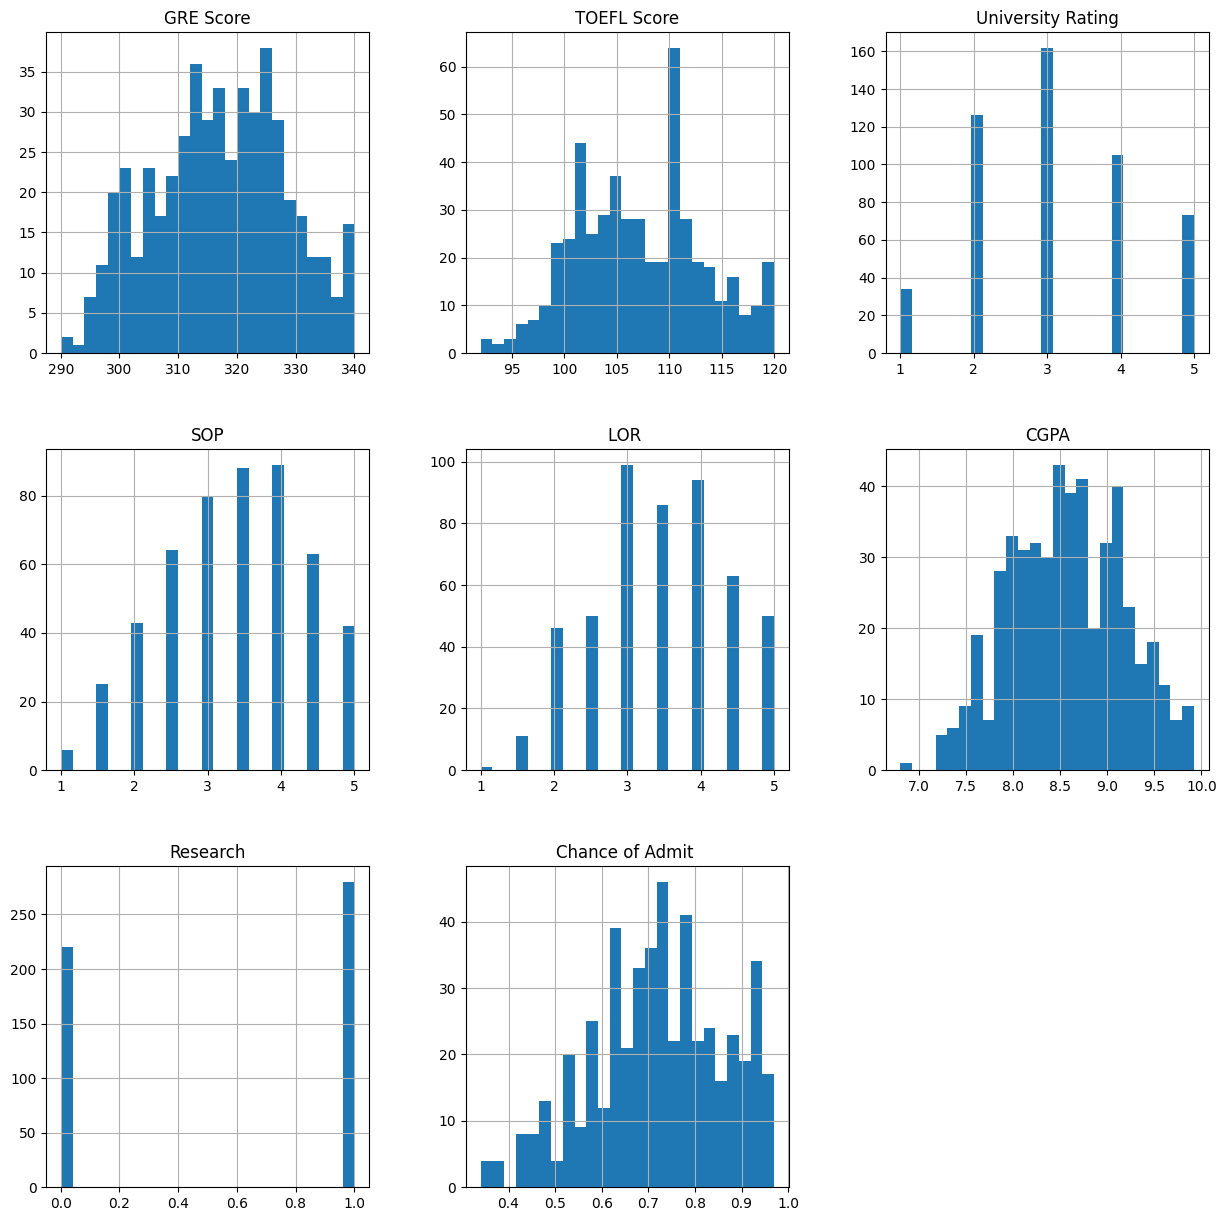

In [5]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [6]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]
Y =pd.DataFrame(Y)
X = pd.DataFrame(X)

In [7]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=22)

In [8]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [9]:
# Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [10]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [11]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [13]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# Celda 1
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

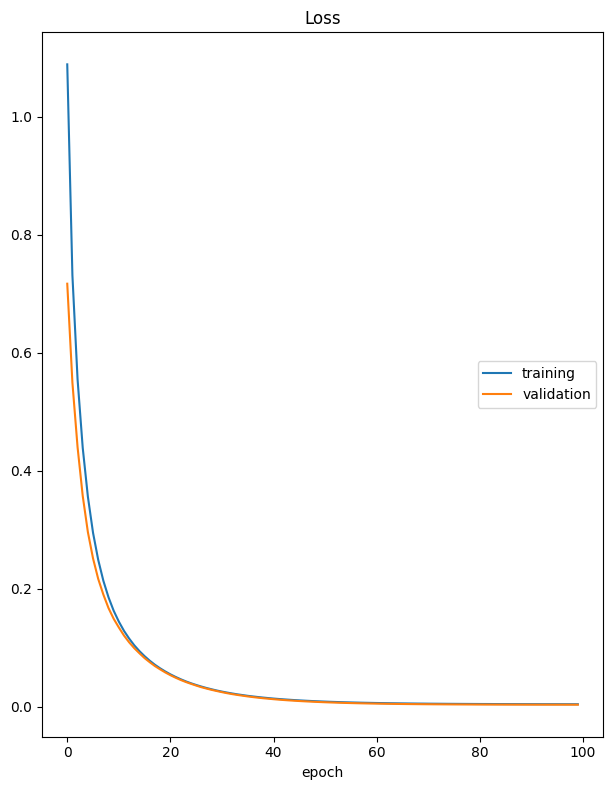

Loss
	training         	 (min:    0.004, max:    1.089, cur:    0.004)
	validation       	 (min:    0.003, max:    0.717, cur:    0.003)
11/11 [==============================] - 0s 36ms/step - loss: 0.0039 - val_loss: 0.0031


In [15]:
# Entrenamiento de la red neuronal con 100 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=100, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [16]:
# Celda 1
# Definición de función de perdida. Se usa mean_absolute_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_absolute_error')

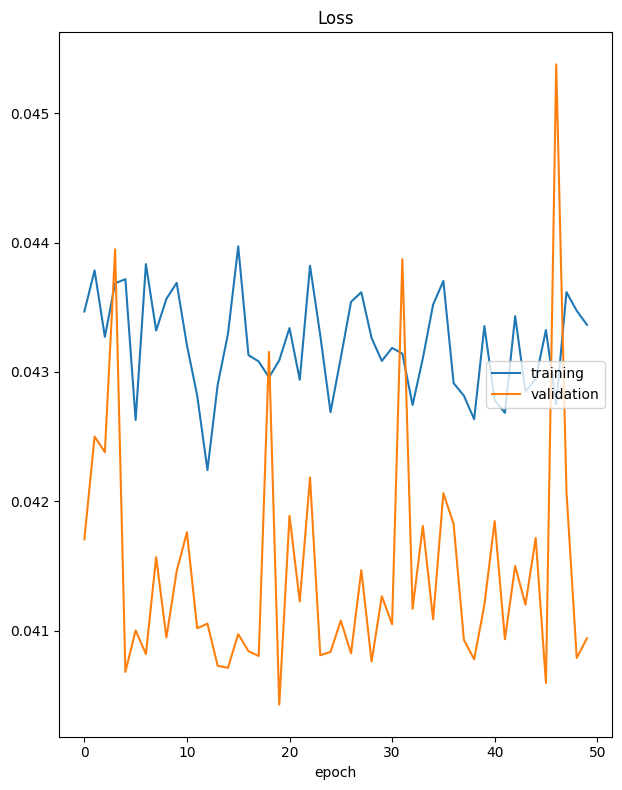

Loss
	training         	 (min:    0.042, max:    0.044, cur:    0.043)
	validation       	 (min:    0.040, max:    0.045, cur:    0.041)
11/11 [==============================] - 1s 60ms/step - loss: 0.0434 - val_loss: 0.0409


In [17]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [18]:
# Evaluación del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred= model.predict(X_test)
MAE1= (mean_squared_error(Y_test,pred))
MSE1= (mean_absolute_error(Y_test,pred))
print("Mean Absolute Error (MAE): {:.4f}".format(mean_squared_error(Y_test,pred)))
print("Mean Squared Error (MSE): {:.4f}".format(mean_absolute_error(Y_test,pred)))

5/5 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 0.0032
Mean Squared Error (MSE): 0.0409


Luego de correr el modelo y graficar el resultado de los errores para trainign y validation con el MSE y el MAE, vemos que a partir aproximadamente a partir de los 60 epochs no hay cambios significativos en los resultados, es decir, alcanzan la estabilidad. 

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [19]:
# Celda 2
from keras.layers import LeakyReLU
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(3, input_shape=(dims,),activation=LeakyReLU(alpha=0.1)))
model.add(Dense(2,activation=LeakyReLU(alpha=0.1)))
model.add(Dense(output_var))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 24        
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer=opts.Adam(lr=0.001), loss='mean_squared_error')

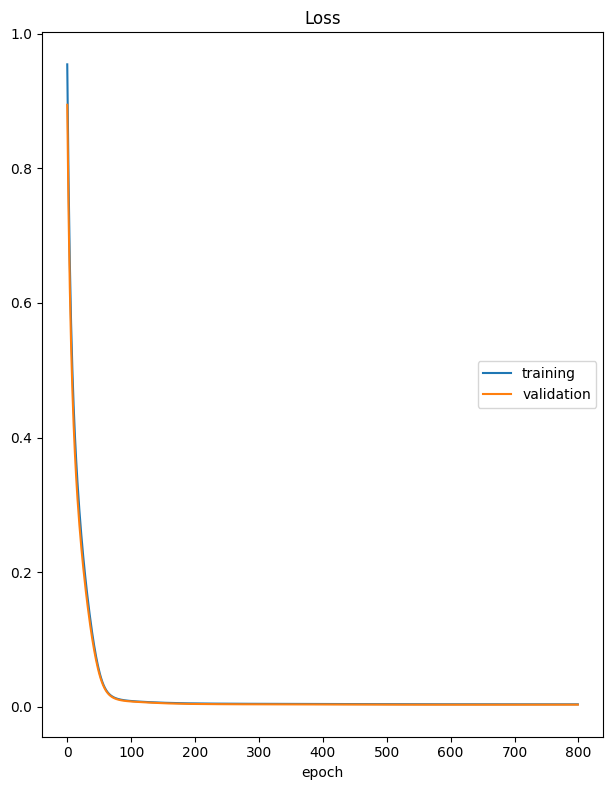

Loss
	training         	 (min:    0.004, max:    0.955, cur:    0.004)
	validation       	 (min:    0.003, max:    0.894, cur:    0.003)
11/11 [==============================] - 1s 59ms/step - loss: 0.0036 - val_loss: 0.0031


In [21]:
# Entrenamiento de la red neuronal con 100 épocas
history = model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=800, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [22]:
# Evaluación del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred= model.predict(X_test)
MAE2= (mean_squared_error(Y_test,pred))
MSE2= (mean_absolute_error(Y_test,pred))
print("Mean Absolute Error (MAE): {:.4f}".format(mean_squared_error(Y_test,pred)))
print("Mean Squared Error (MSE): {:.4f}".format(mean_absolute_error(Y_test,pred)))

5/5 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.0031
Mean Squared Error (MSE): 0.0415


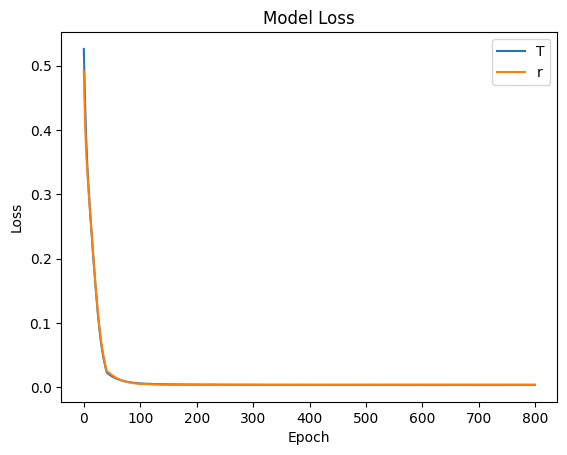

In [62]:
# Gráfica de la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend('Train')

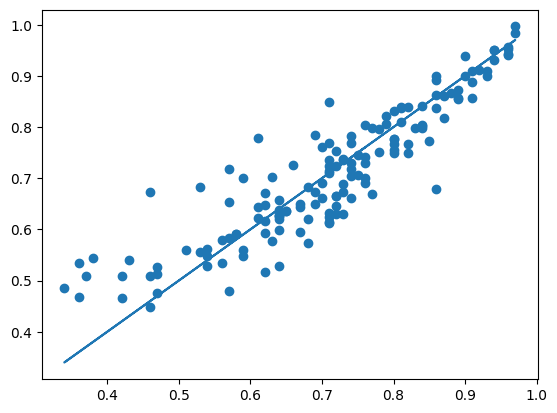

In [63]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,pred)
plt.plot(Y_test,Y_test)
plt.show()

El modelo red neuronal multicapa con MSE 0.0415 y MAE 0.0031 tiene un MSE y un MAE muy similares al modelo anterior. En términos de precisión, ambos modelos tienen un rendimiento muy similar.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [23]:
# Celda 3
# Definición de la red neuronal

model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation=LeakyReLU(alpha=0.1)))
model.add(Dropout(0.2))
model.add(Dense(8, activation=LeakyReLU(alpha=0.1)))
model.add(Dropout(0.2))
model.add(Dense(output_var))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                96        
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compilación del modelo
model.compile(optimizer=opts.Adam(lr=0.001), loss='mean_squared_error')

In [25]:
# Early stopping para evitar sobreajuste
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=60, verbose=1)

In [27]:
# Entrenamiento de la red neuronal con 100 épocas
history=model.fit(X_train, Y_train,
          validation_data = (X_test, Y_test),
          epochs=200, callbacks=[early_stop])

Epoch 1/200
11/11 [==============================] - 0s 15ms/step - loss: 0.0073 - val_loss: 0.0052
Epoch 2/200
11/11 [==============================] - 0s 11ms/step - loss: 0.0076 - val_loss: 0.0052
Epoch 3/200
11/11 [==============================] - 0s 10ms/step - loss: 0.0068 - val_loss: 0.0051
Epoch 4/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0073 - val_loss: 0.0052
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0079 - val_loss: 0.0051
Epoch 6/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0050
Epoch 7/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0051
Epoch 8/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0081 - val_loss: 0.0052
Epoch 9/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0051
Epoch 10/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0073 - val_loss: 0.0051
Epoch 

In [28]:
pred= model.predict(X_test)
MAE3= (mean_squared_error(Y_test,pred))
MSE3= (mean_absolute_error(Y_test,pred))
print("Mean Absolute Error (MAE): {:.4f}".format(mean_squared_error(Y_test,pred)))
print("Mean Squared Error (MSE): {:.4f}".format(mean_absolute_error(Y_test,pred)))

5/5 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.0039
Mean Squared Error (MSE): 0.0460


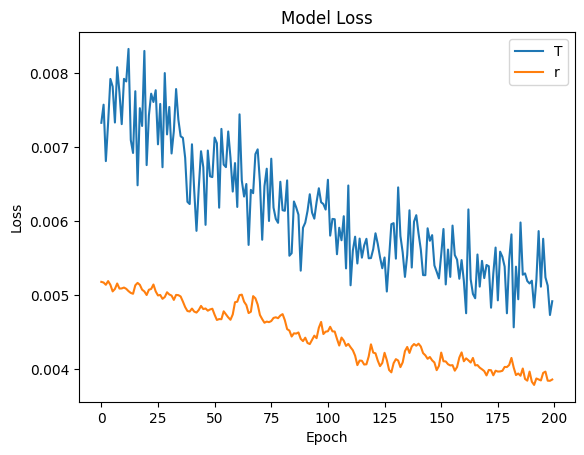

In [29]:
# Gráfica de la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend('Train')

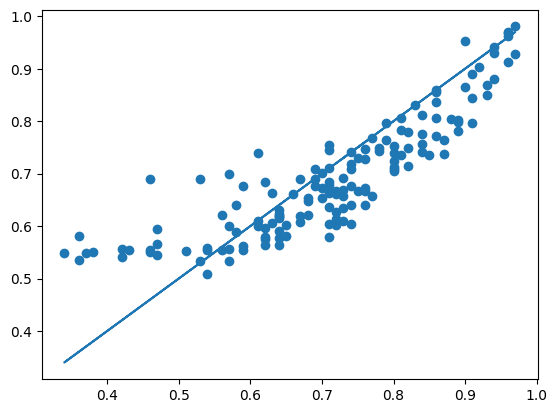

In [48]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,pred)
plt.plot(Y_test,Y_test)
plt.show()

El modelo red neuronal multicapa Early Dropout con MSE 0.0459 y MAE 0.0039 tiene el mayor MSE y el mayor MAE de los tres modelos. Esto indica que tiene un rendimiento inferior en la predicción. 

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

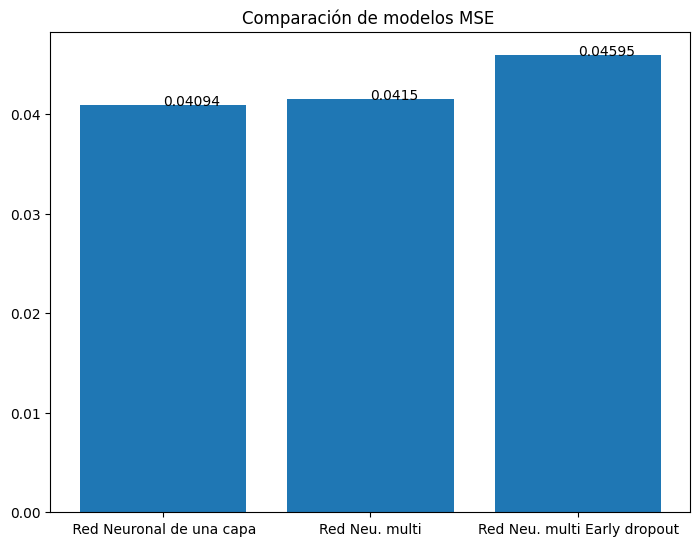

In [30]:
# Celda 4
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos MSE ")
ejeX = [' Red Neuronal de una capa', 'Red Neu. multi',  'Red Neu. multi Early dropout']
ejeY = [round(MSE1,5), round(MSE2,5), round(MSE3,5)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

De acuerdo con los resultados obtenidos en la comparación de los tres modelos de redes neuronales, el modelo con un MSE y un MAE más bajos se considera mejor, ya que esto significa que está prediciendo con mayor precisión.
Según estos resultados, a continuación, se muestran las ventajas y desventajas:

- El modelo red neuronal de una capa con MSE 0.0409 y MAE 0.0032 es el que tiene el menor MSE y el segundo menor MAE de los tres modelos. Esto indica que tiene un buen rendimiento en la predicción.

- El modelo red neuronal multicapa con MSE 0.0415 y MAE 0.0031 tiene un MSE y un MAE muy similares al modelo anterior. En términos de precisión, ambos modelos tienen un rendimiento muy similar.

- El modelo red neuronal multicapa Early Dropout con MSE 0.0459 y MAE 0.0039 tiene el mayor MSE y el mayor MAE de los tres modelos. Esto indica que tiene un rendimiento inferior en la predicción. 

En algunos casos puede que sea más importante tener en cuenta otros factores que no se miden directamente en estas métricas, como la interpretabilidad del modelo o el tiempo de entrenamiento.